 Note: the filtering during the text search was based purely on the RLS constraints (i.e. no "where" conditions were applied).

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def find_irrelevant_rows(file_name):
    file = open(file_name, "r")
    i = 0
    res = [0,1]
    for line in file.readlines():
        if line[0] == "?":
            res.append(i)
        i += 1
    file.close()
    return res

In [7]:
names = ["rows", "tot_costs", "exec_time", "exec_time_cs", "plan_time", "ncond", "ind", "stmt"]

no_rls = pd.read_csv("V0/text_serach_queries_out.csv", delimiter="|", 
                     header = None, names=names, skiprows=find_irrelevant_rows("V0/text_serach_queries_out.csv"))
no_rls["nattr"] = no_rls["ncond"]


stage_acta = pd.read_csv("V1/text_serach_queries_out.csv", delimiter="|", 
                         header = None, names=names, skiprows=find_irrelevant_rows("V1/text_serach_queries_out.csv"))
stage_acta["nattr"] = stage_acta["ncond"]+2


acta_tenant = pd.read_csv("V2/text_serach_queries_out.csv", delimiter="|", 
                          header = None, names=names, skiprows=find_irrelevant_rows("V2/text_serach_queries_out.csv"))
acta_tenant["nattr"] = acta_tenant["ncond"]+2


ten_ct_acta_stage = pd.read_csv("V3/text_serach_queries_out.csv", delimiter="|", 
            header = None, names=names, skiprows=find_irrelevant_rows("V3/text_serach_queries_out.csv"))
ten_ct_acta_stage["nattr"] = ten_ct_acta_stage["ncond"]+4


full_rls = pd.read_csv("V4/text_serach_queries_out.csv", delimiter="|", 
            header = None, names=names, skiprows=find_irrelevant_rows("V4/text_serach_queries_out.csv"))
full_rls["nattr"] = full_rls["ncond"]+7

In [45]:
avg_search_time = [no_rls.exec_time[no_rls.rows >0].sum()/no_rls.rows.sum(),
                   stage_acta[stage_acta.rows >0].exec_time.sum()/stage_acta.rows.sum(),
                   acta_tenant[acta_tenant.rows >0].exec_time.sum()/acta_tenant.rows.sum(),
                   ten_ct_acta_stage[ten_ct_acta_stage.rows >0].exec_time.sum()/ten_ct_acta_stage.rows.sum(),
                   full_rls[full_rls.rows >0].exec_time.sum()/full_rls.rows.sum()    
                  ]

Text(0.5, 1.0, 'Average time for retrieving one index')

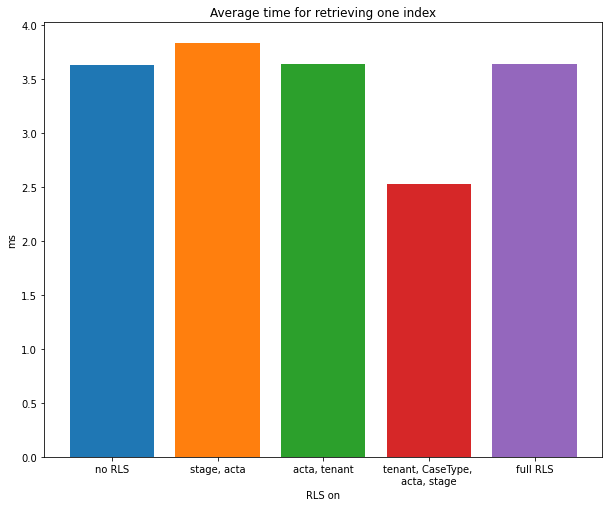

In [46]:
labels = ["no RLS", "stage, acta", "acta, tenant", "tenant, CaseType, \nacta, stage", "full RLS"]
plt.figure(figsize=(10,8))
for l, a in zip(labels, avg_search_time):
    plt.bar(l, a)

plt.ylabel("ms")
plt.xlabel("RLS on")
plt.title("Average time for retrieving one index")

# Average time for traversing 1 kB

alfbasic0=# select avg(asize) from alfbasic where bstream is not null;
        avg         
--------------------
 81377.071357285429
(1 row)

In [63]:
avg_trav_time = np.array([no_rls[no_rls.rows >0].exec_time.sum()/no_rls.rows.sum(),
                   stage_acta[stage_acta.rows >0].exec_time.sum()/stage_acta.rows.sum(),
                   acta_tenant[acta_tenant.rows >0].exec_time.sum()/acta_tenant.rows.sum(),
                   ten_ct_acta_stage[ten_ct_acta_stage.rows >0].exec_time.sum()/ten_ct_acta_stage.rows.sum(),
                   full_rls.exec_time[full_rls.rows >0].sum()/full_rls.rows.sum()    
                  ])
avg_trav_time = avg_trav_time/81

Text(0.5, 1.0, 'Average time for traversing 1 kB')

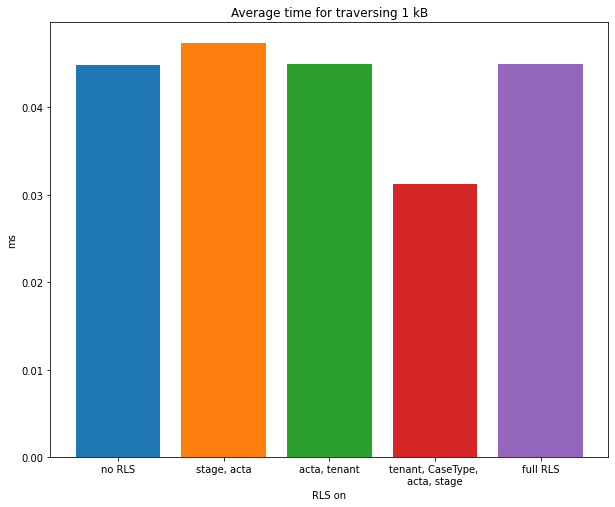

In [64]:
plt.figure(figsize=(10,8))
for l, a in zip(labels, avg_trav_time):
    plt.bar(l, a)

plt.ylabel("ms")
plt.xlabel("RLS on")
plt.title("Average time for traversing 1 kB")